In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima

In [3]:
data_final = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\LCV_input_2023.xlsx")
#data = data.iloc[6:-1,:]
data_final.shape

(162, 41)

In [4]:
data_final.isnull().sum()

Date                                          0
LCV Sales                                    24
FoodAGRO                                     24
Food products                                24
Consumer goods                               24
Cosmetics, toiletries, soaps & detergents    24
Electronics                                  24
Wholesale & retail trading(mil)              24
Wholesale trading(mil)                       24
Retail trading(mil)                          24
M1                                           24
M3                                           24
BEI                                          24
IIP                                          24
PMI                                          24
CC                                           24
WPI                                          24
CMR                                          24
Vloans                                       24
E-comm                                       24
Retail Sales                            

In [5]:
data_final.columns

Index(['Date', 'LCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading(mil)', 'Wholesale trading(mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'HCV Sales', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'GVA_Manu',
       'Electricity', 'GVA_Cons', 'Trade', 'Real estate',
       'Social  and personal  services '],
      dtype='object')

In [6]:
## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [7]:
columns_to_forecast = ['IIP','PMI',
       'CMR', 'Vloans','Retail Sales','Ind_freight','HCV Sales']

In [8]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(162, 7)

In [9]:
data

,IIP,PMI,CMR,Vloans,Retail Sales,Ind_freight,HCV Sales
Date,,,,,,,
2011-07-01,100.31,52.1,7.180400,768.56,474.0,109.317315,29539.0
2011-08-01,100.31,52.8,7.228000,773.96,474.0,109.059972,29559.0
2011-09-01,100.31,53.1,7.450455,772.12,474.0,108.807408,33803.0
2011-10-01,100.31,52.8,7.704167,785.40,474.0,108.555673,28685.0
2011-11-01,100.31,51.3,7.687391,802.35,474.0,108.296462,28518.0
...,...,...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


24 IIP
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1070.847, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=955.101, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1068.860, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=984.797, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=937.859, Time=0.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1041.654, Time=0.42 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=939.240, Time=0.69 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=939.034, Time=0.64 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=973.706, Time=0.50 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=940.682, Time=0.98 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

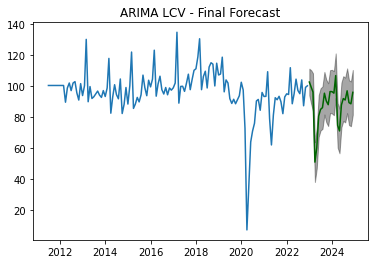

24 PMI
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=765.901, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=686.130, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=764.131, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=714.656, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=660.324, Time=0.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=650.042, Time=0.51 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=651.836, Time=0.79 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=711.051, Time=0.42 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=645.748, Time=0.60 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=655

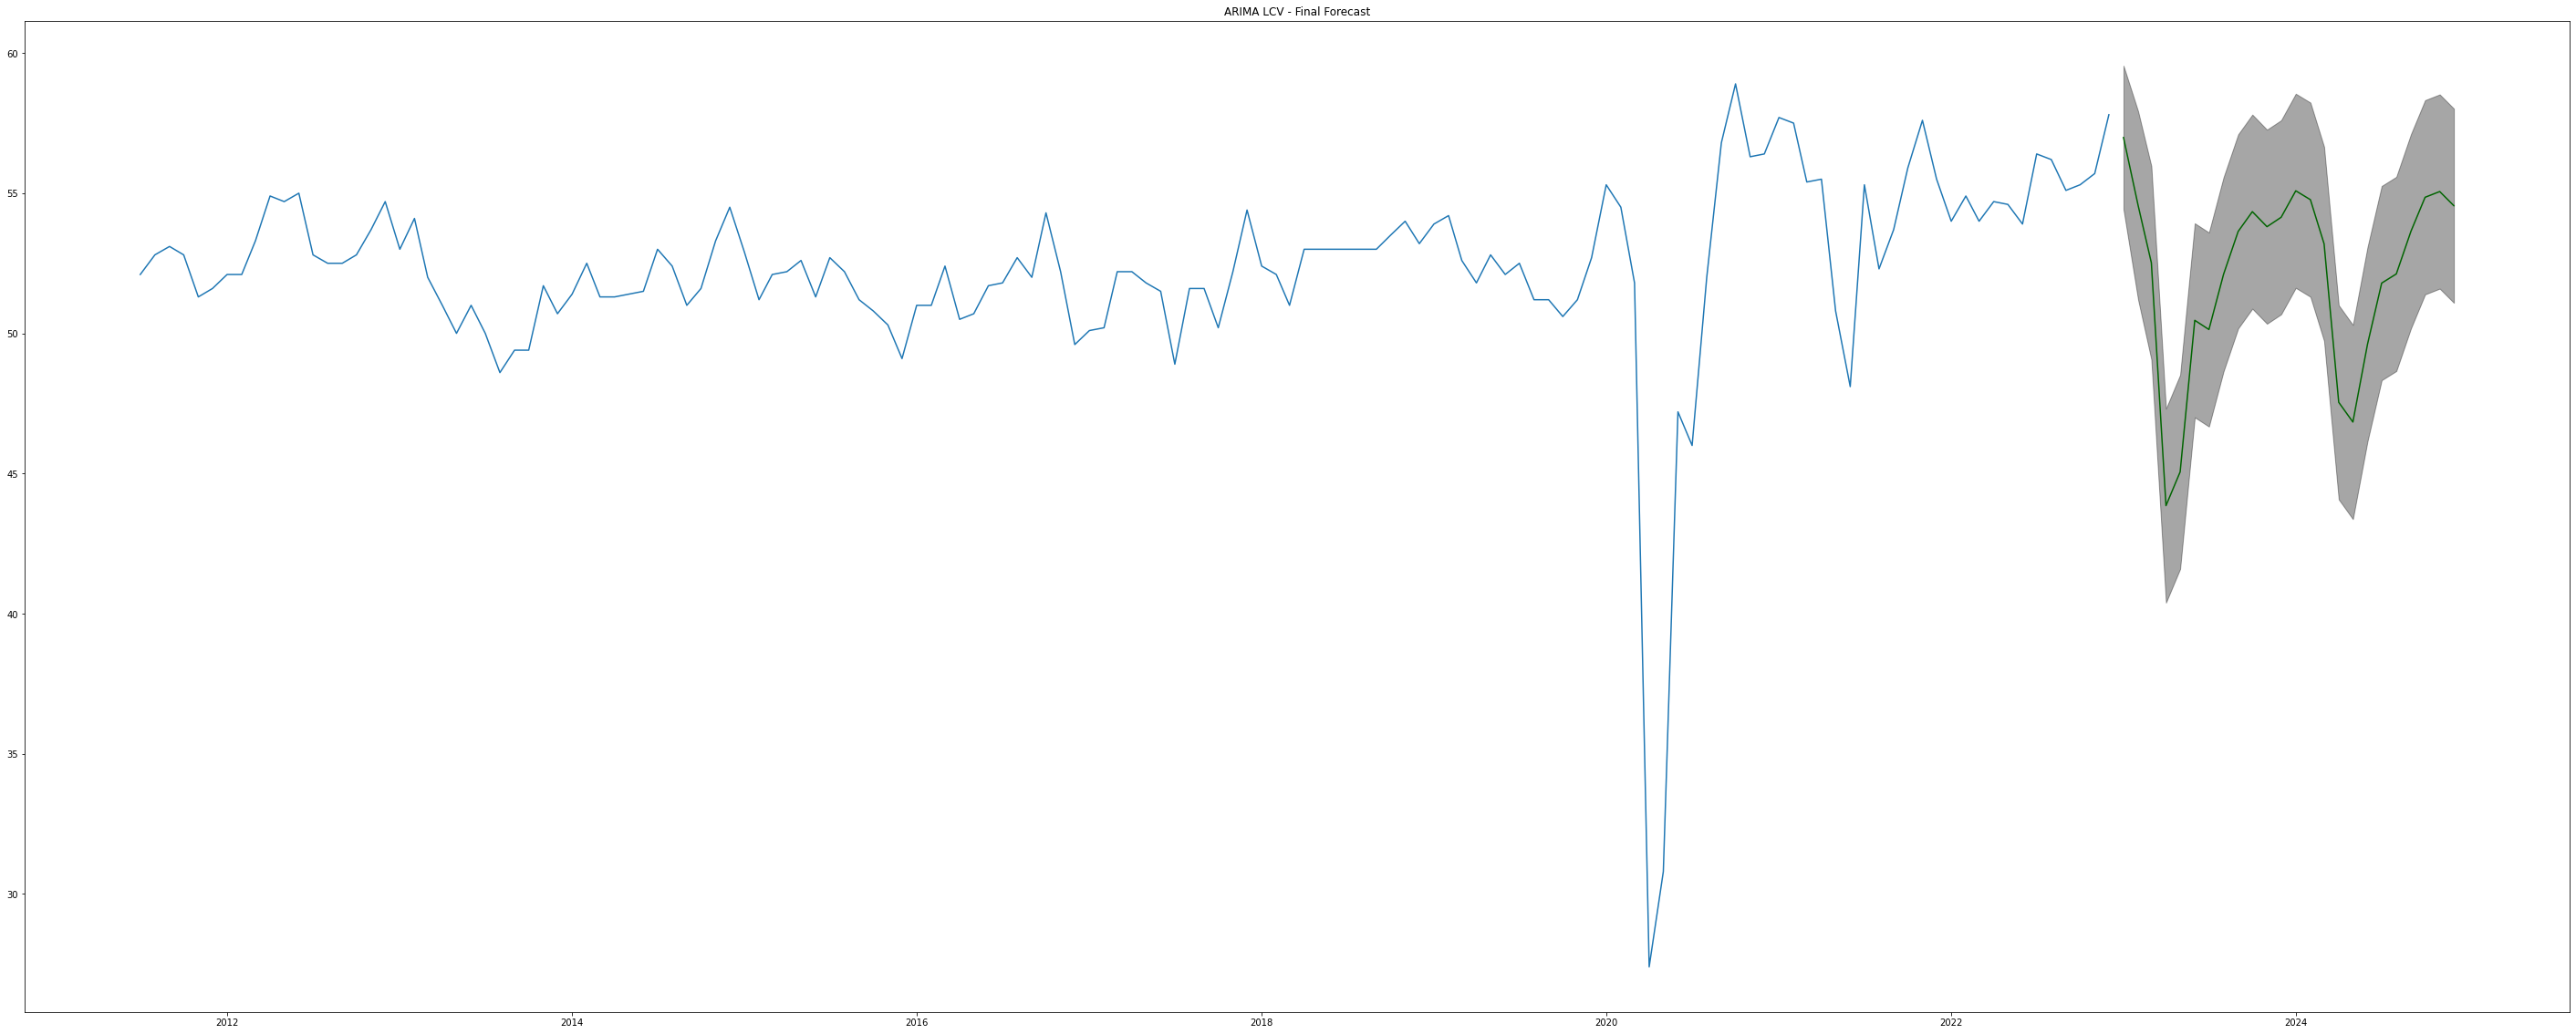

24 CMR
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=590.594, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=414.581, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=590.465, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=444.808, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=407.381, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=570.836, Time=0.30 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=407.786, Time=0.52 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=407.672, Time=0.53 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=462.732, Time=0.52 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=405

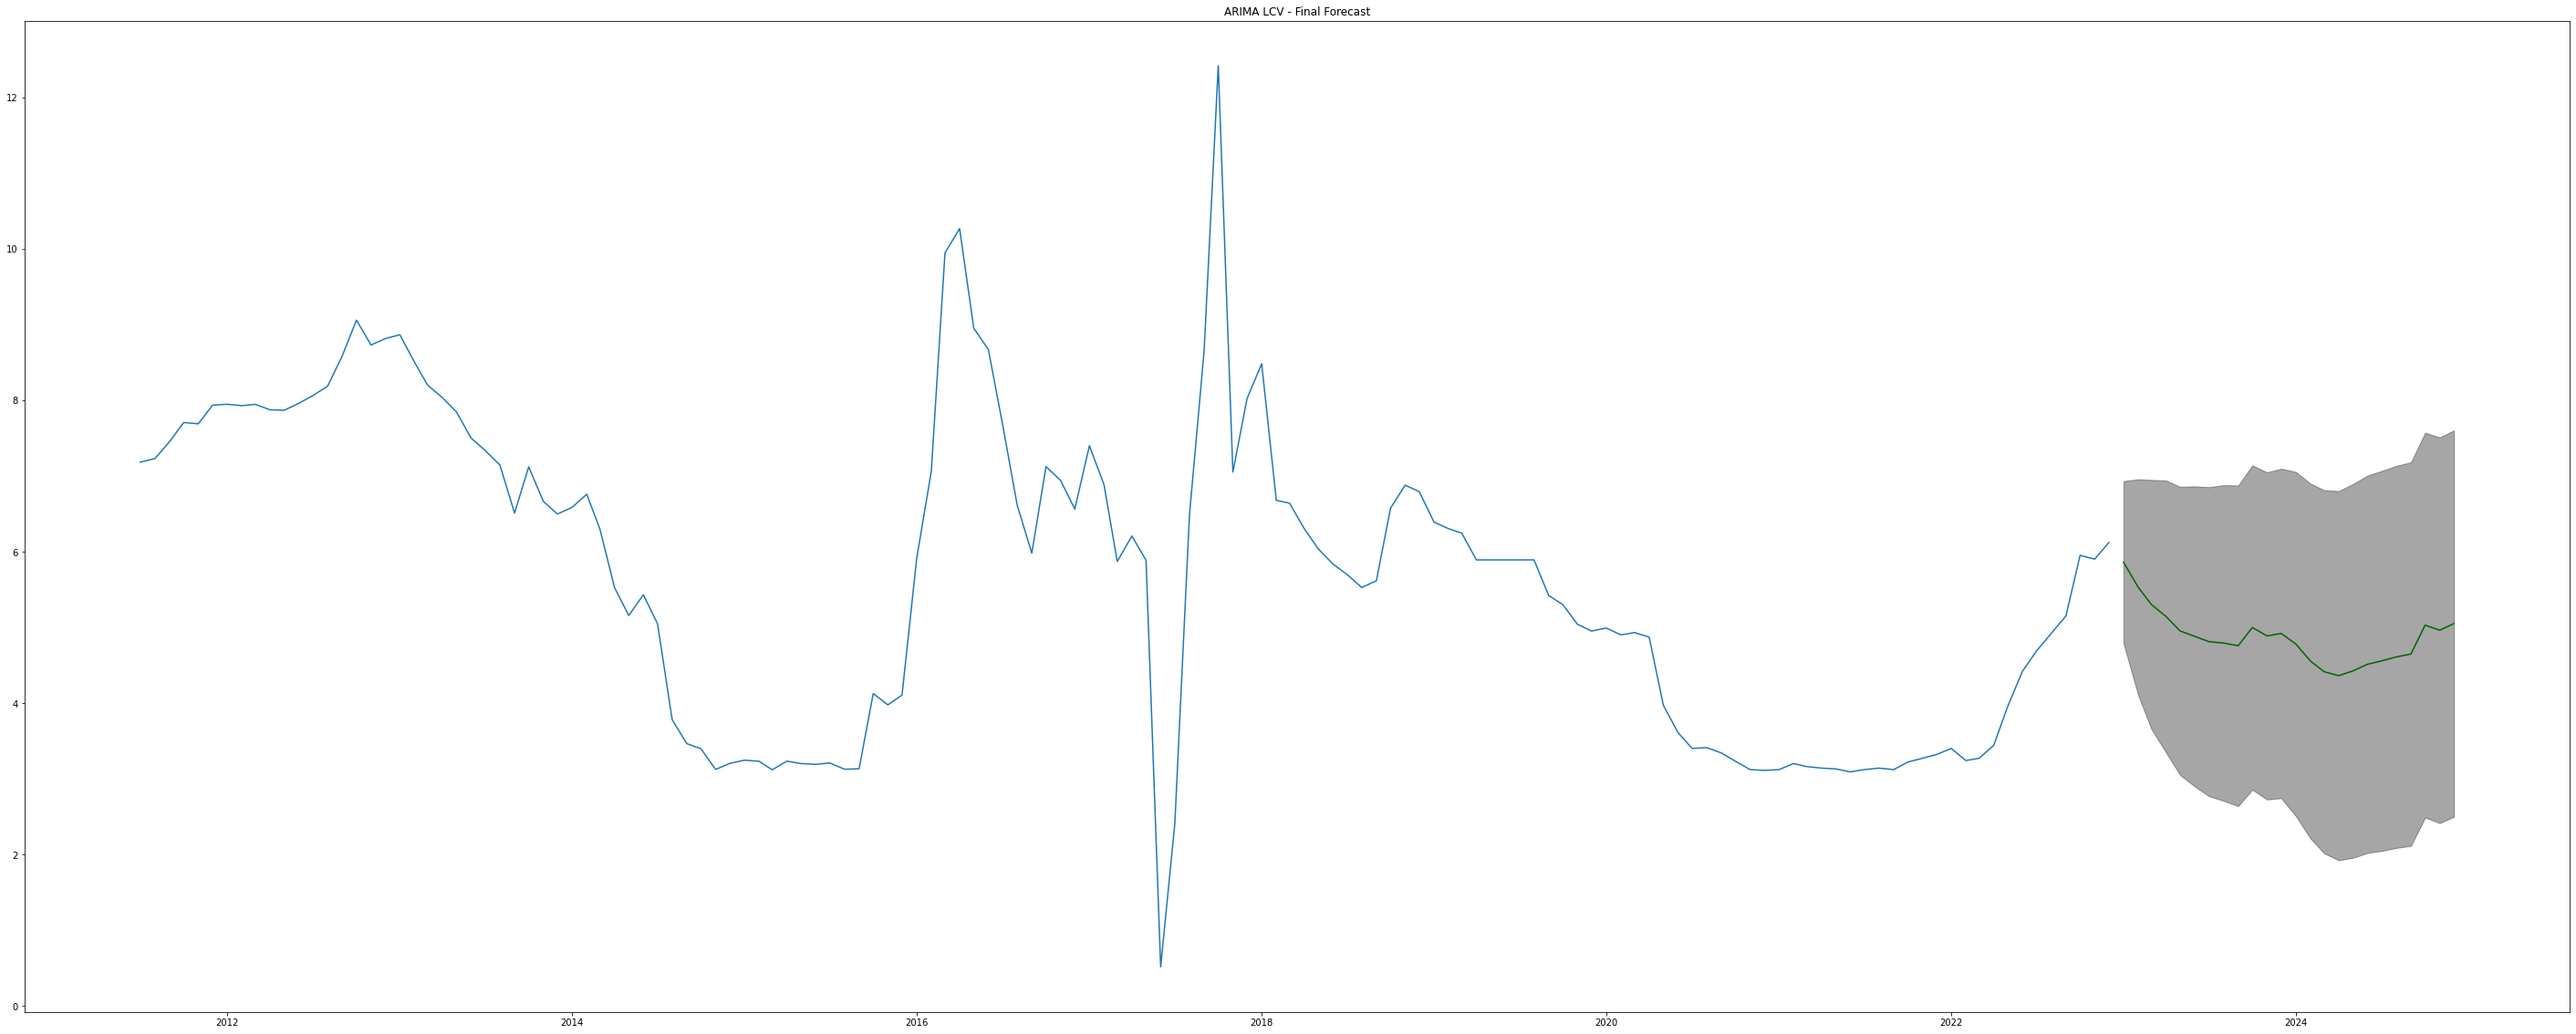

24 Vloans
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1500.003, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1809.069, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1511.833, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1900.510, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1558.229, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1497.368, Time=0.73 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1510.344, Time=0.65 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=1499.683, Time=2.01 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1499.817, Time=1.87 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1497.577, Time=1.13 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1500.060, Time=1.41 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(1,1,1)[12]

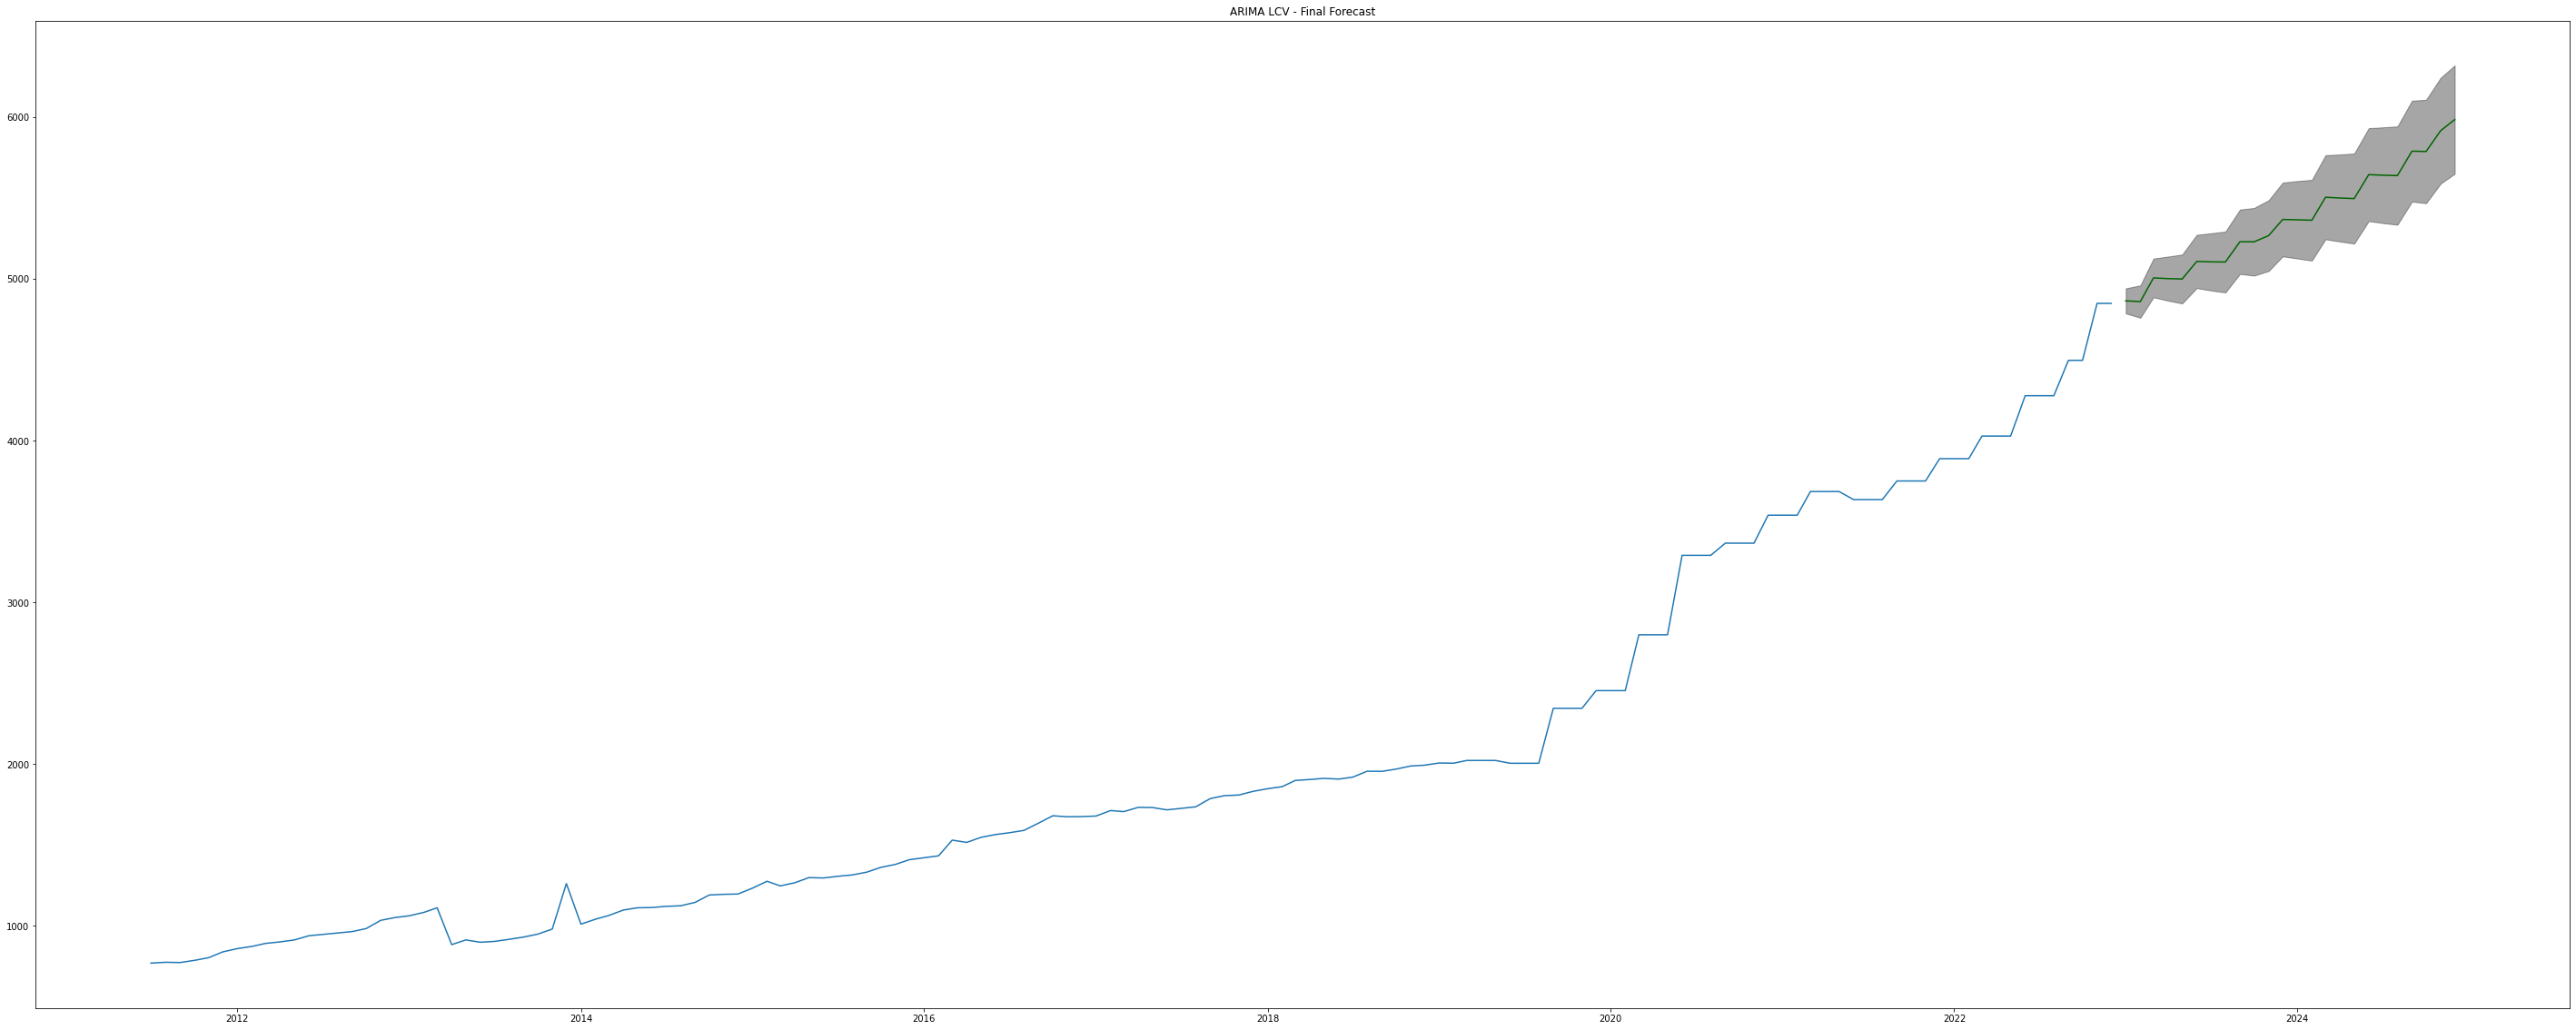

24 Retail Sales
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1675.084, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1396.389, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1560.126, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1678.912, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1419.182, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1386.324, Time=0.99 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1676.938, Time=0.45 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1388.100, Time=1.11 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1388.103, Time=1.29 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1561.745, Time=0.87 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=1390.096, Time=1.69 sec
 ARIMA(1,0,0)(2,1,

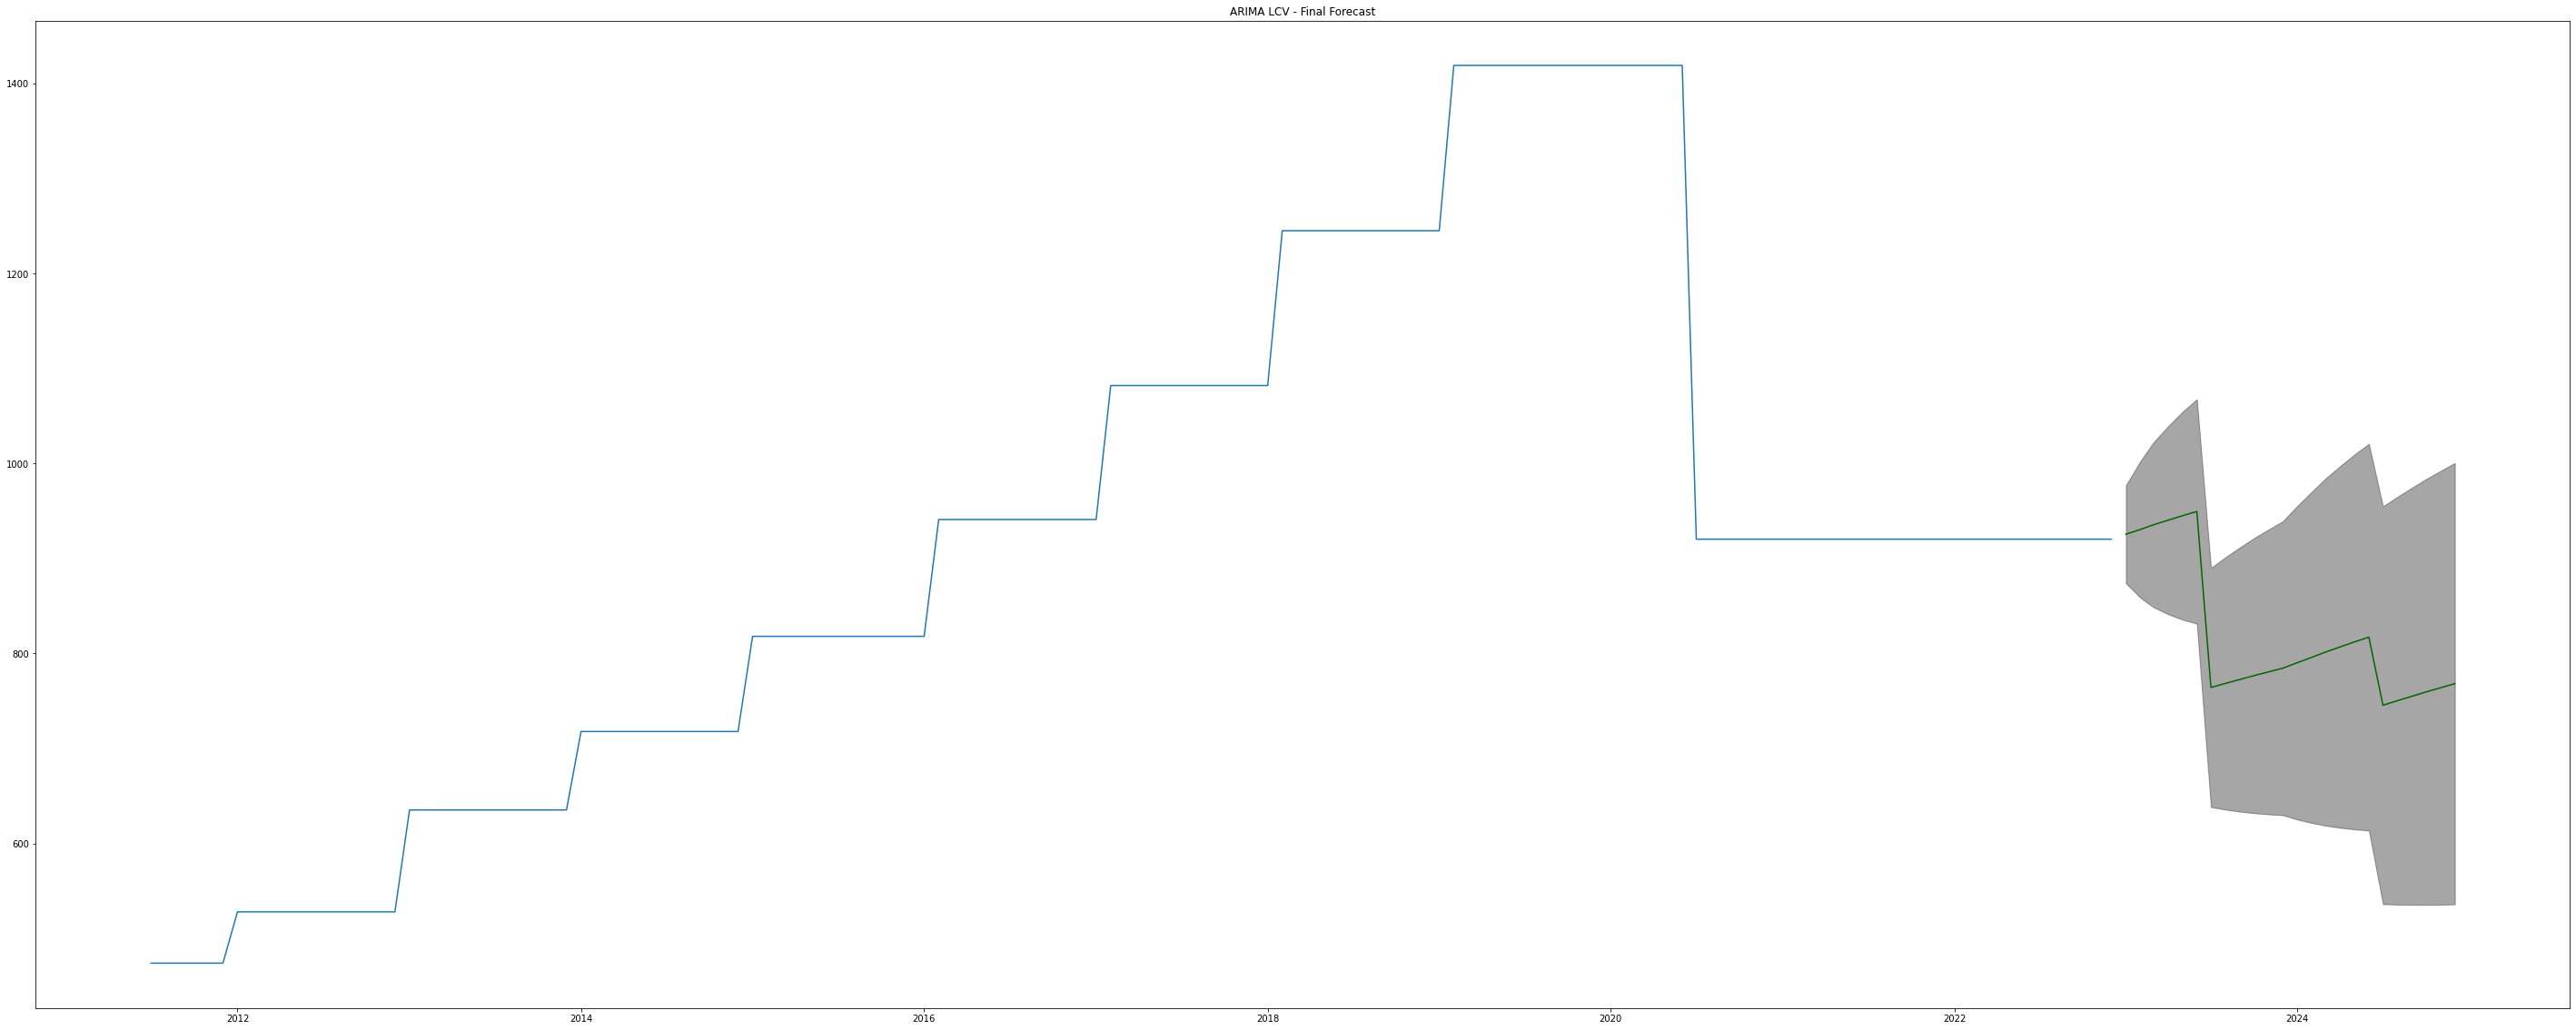

24 Ind_freight
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=859.818, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=661.243, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=859.220, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=680.952, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=649.247, Time=0.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=849.544, Time=0.39 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=651.238, Time=0.59 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=651.240, Time=0.61 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=758.494, Time=0.48 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=652.733, Time=0.97 sec
 ARIMA(1,0,0)(2,1,0)[12]          

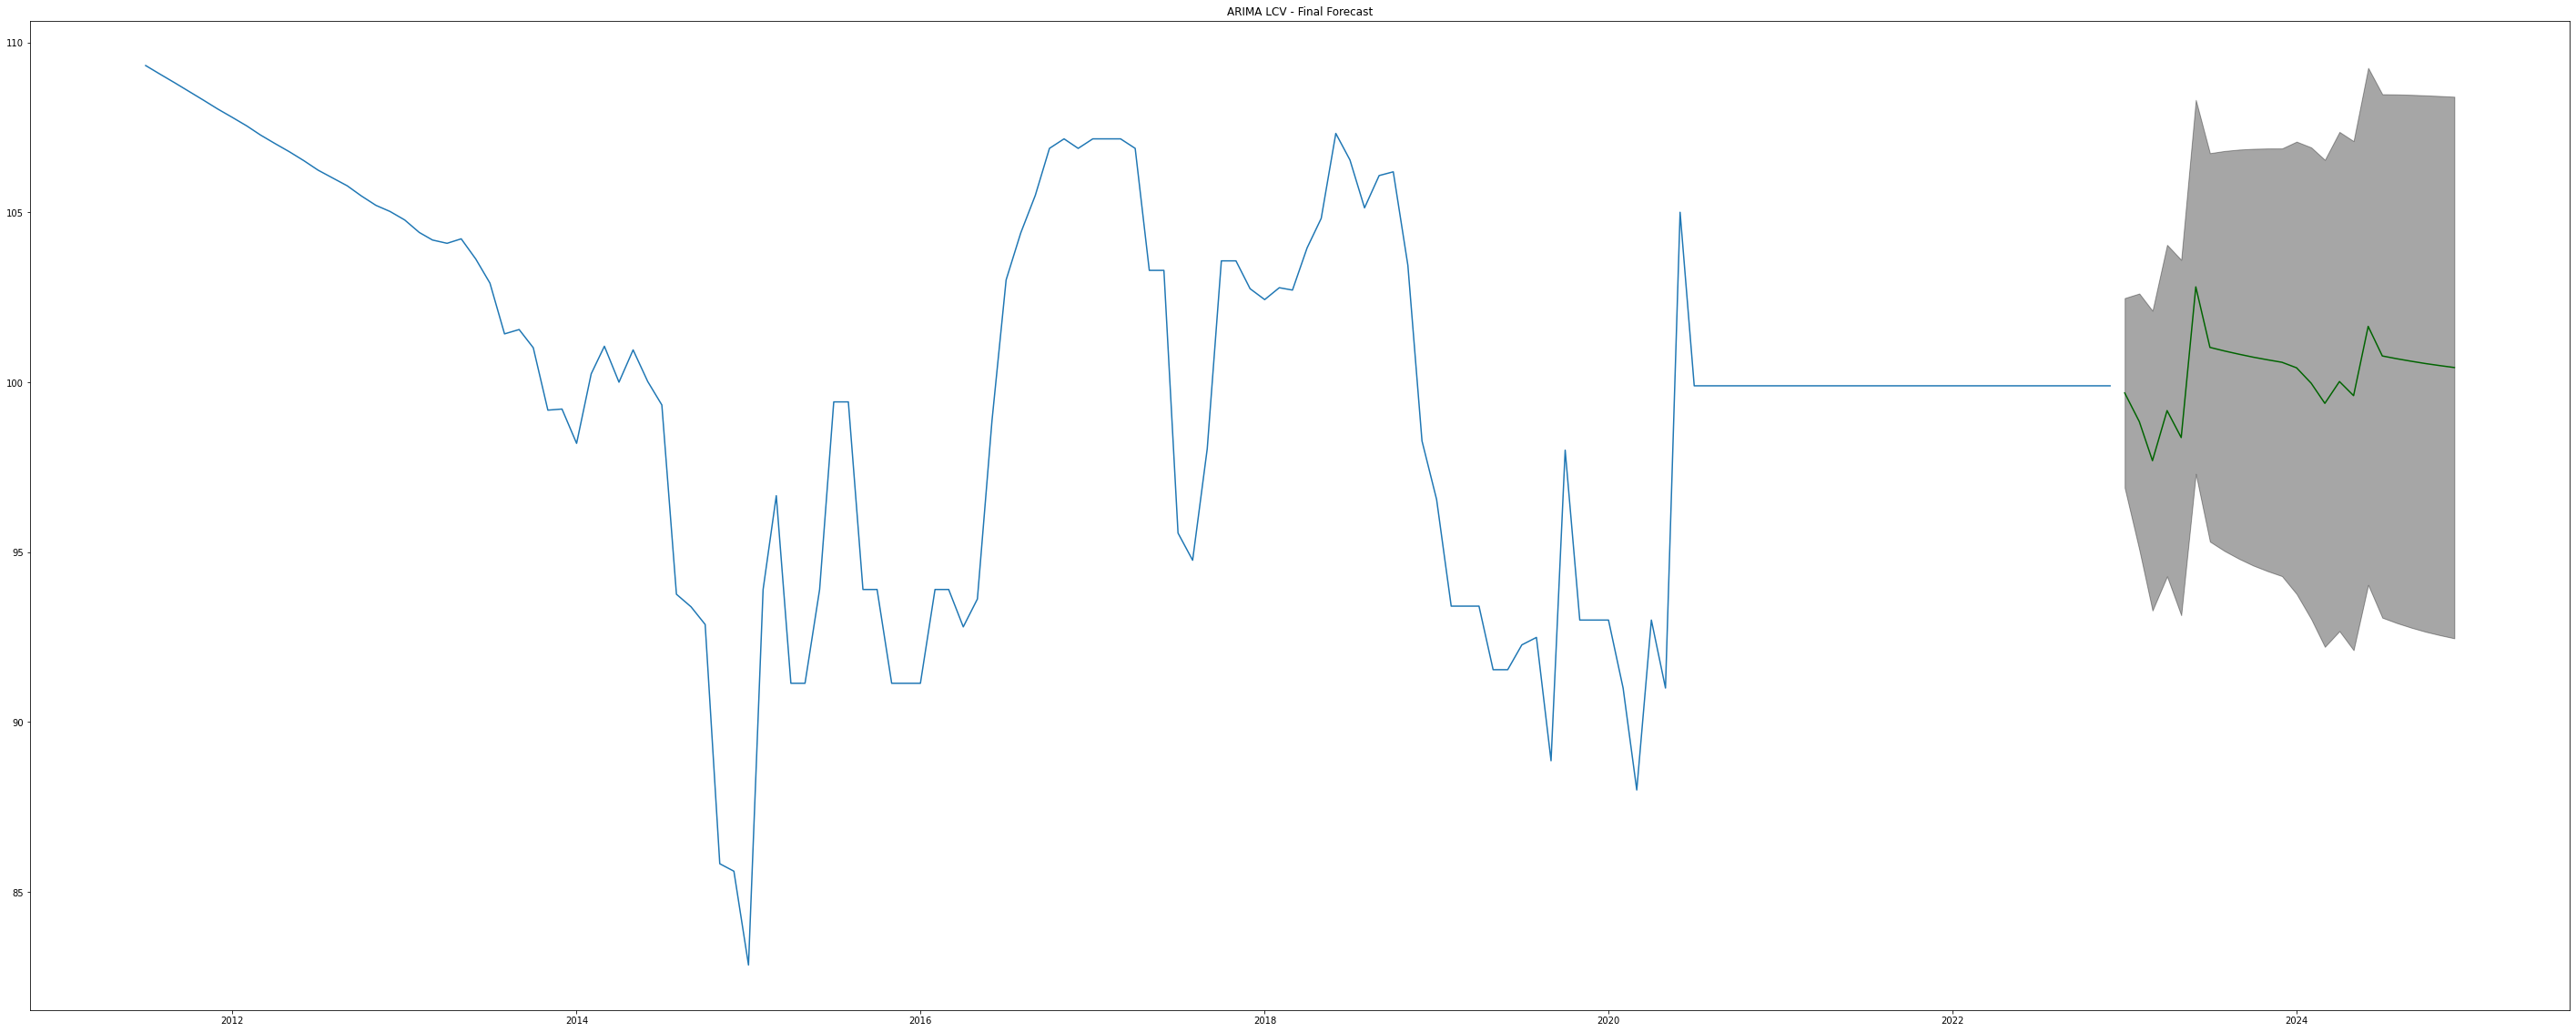

24 HCV Sales
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2485.370, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2537.487, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2517.736, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2517.824, Time=0.22 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2499.233, Time=0.41 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2484.314, Time=0.84 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=inf

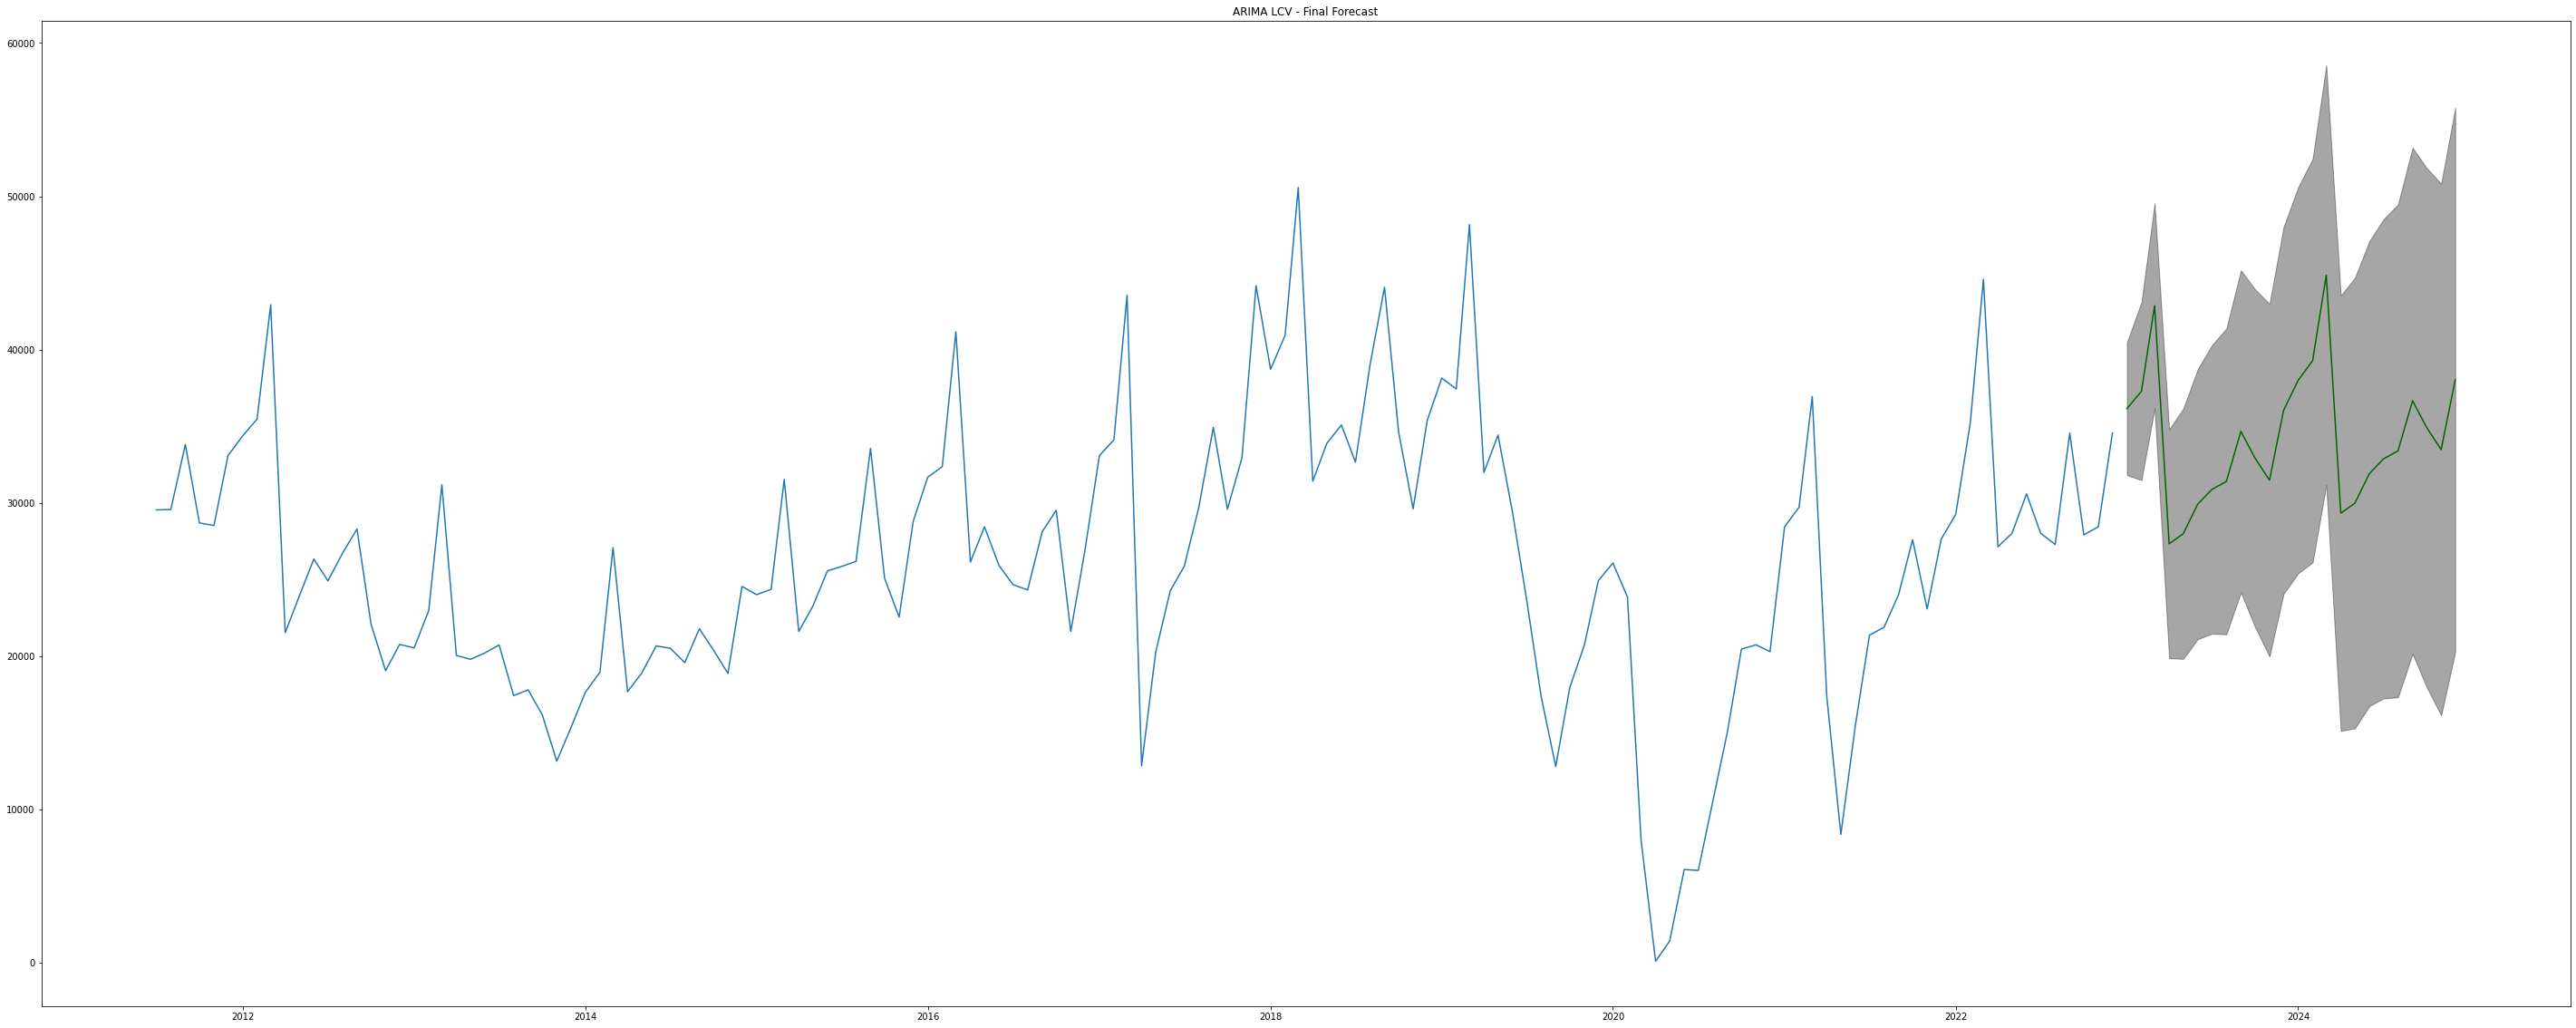

In [10]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA LCV - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [11]:
## Resetting the index after the forecast and mapping

data.to_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\LCV_Forecast_2023_2024.csv",index=False)